In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [80]:
# Load your dataset
data = pd.read_csv("../Dataset/Dataset.csv", na_values="?")
data

,Age,Bp,Sg,Al,Su,Rbc,Pc,Pcc,Ba,Bgr,...,Pcv,Wbcc,Rbcc,Htn,Dm,Cad,Appet,pe,Ane,Class
0,48.0,50,1.020,4,0,1,1.0,0.0,0.0,121.0,...,44.0,6000,4.71,1.0,1,0.0,1.0,0.0,0.0,1
1,7.0,80,1.010,2,0,1,1.0,0.0,0.0,NaN,...,38.0,7500,4.71,0.0,0,0.0,1.0,0.0,0.0,1
2,62.0,70,1.005,4,3,1,1.0,0.0,0.0,423.0,...,31.0,6700,3.90,1.0,1,0.0,0.0,0.0,1.0,1
3,48.0,80,1.010,2,0,1,0.0,1.0,0.0,117.0,...,32.0,7300,4.60,0.0,0,0.0,0.0,1.0,1.0,1
4,51.0,90,1.015,3,0,1,1.0,0.0,0.0,106.0,...,35.0,7800,4.40,1.0,0,0.0,1.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10316,35.0,60,1.020,0,0,1,1.0,0.0,0.0,131.0,...,41.0,16700,4.80,0.0,0,0.0,1.0,0.0,0.0,1
10317,58.0,60,1.020,0,0,1,1.0,0.0,0.0,NaN,...,52.0,9200,3.40,1.0,0,0.0,1.0,0.0,0.0,1
10318,61.0,60,1.020,0,0,1,1.0,0.0,0.0,99.0,...,47.0,8406,4.71,0.0,0,0.0,1.0,0.0,0.0,1
10319,30.0,60,1.025,0,0,1,1.0,0.0,0.0,102.0,...,42.0,2600,2.80,1.0,0,0.0,1.0,0.0,0.0,1


In [81]:
# Preprocessing
# Handle missing values
data = data.fillna(method='ffill')

In [82]:
# Encode categorical variables
categorical_cols = ['Rbc', 'Pc', 'Pcc', 'Ba', 'Htn', 'Dm', 'Cad', 'Appet', 'pe', 'Ane']
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

In [83]:
# Normalize numerical features
numerical_cols = ['Age', 'Bp', 'Sg', 'Al', 'Su', 'Bgr', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Pcv', 'Wbcc', 'Rbcc']
scaler = StandardScaler()
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

In [84]:
# Create sequences for time-series data
sequence_length = 5  # Choose an appropriate sequence length
sequences = []
labels = []

In [85]:
# Split the data into training, validation, and test sets
X = data.drop(columns=['Class'])
y = data['Class']
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [86]:
# Build a basic feedforward neural network
model_ffnn = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Dense(64, activation='relu'),     # Hidden layers
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')  # Output layer (assuming 2 classes)
])

In [87]:
model_ffnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [88]:
# Train the FFNN model
num_epochs = 50
batch_size = 32

history_ffnn = model_ffnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)

Epoch 1/50
226/226 [==============================] - 1s 3ms/step - loss: 0.2774 - accuracy: 0.8908 - val_loss: 0.1912 - val_accuracy: 0.9354
Epoch 2/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1924 - accuracy: 0.9369 - val_loss: 0.1815 - val_accuracy: 0.9328
Epoch 3/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1830 - accuracy: 0.9406 - val_loss: 0.1815 - val_accuracy: 0.9373
Epoch 4/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1738 - accuracy: 0.9423 - val_loss: 0.1687 - val_accuracy: 0.9399
Epoch 5/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1679 - accuracy: 0.9430 - val_loss: 0.1665 - val_accuracy: 0.9386
Epoch 6/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1568 - accuracy: 0.9466 - val_loss: 0.1595 - val_accuracy: 0.9406
Epoch 7/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1498 - accuracy: 0.9502 - val_loss: 0.1617 - val_accuracy: 0.9386
Epoch 

In [89]:
# Build a Convolutional Neural Network (CNN)
model_cnn = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),  # Input layer
    layers.Reshape((X_train.shape[1], 1)),    # Reshape for 1D convolution
    layers.Conv1D(32, kernel_size=3, activation='relu'),  # Convolutional layer
    layers.MaxPooling1D(pool_size=2),  # Max-pooling layer
    layers.Flatten(),  # Flatten for fully connected layers
    layers.Dense(64, activation='relu'),  # Hidden layer
    layers.Dense(2, activation='softmax')  # Output layer (assuming 2 classes)
])

In [90]:
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
# Train the CNN model
history_cnn = model_cnn.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)

Epoch 1/50
226/226 [==============================] - 1s 3ms/step - loss: 0.2929 - accuracy: 0.8801 - val_loss: 0.2092 - val_accuracy: 0.9180
Epoch 2/50
226/226 [==============================] - 0s 2ms/step - loss: 0.2029 - accuracy: 0.9272 - val_loss: 0.2101 - val_accuracy: 0.9225
Epoch 3/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9355 - val_loss: 0.1774 - val_accuracy: 0.9335
Epoch 4/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1799 - accuracy: 0.9355 - val_loss: 0.1656 - val_accuracy: 0.9399
Epoch 5/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1720 - accuracy: 0.9408 - val_loss: 0.1630 - val_accuracy: 0.9393
Epoch 6/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1640 - accuracy: 0.9420 - val_loss: 0.1598 - val_accuracy: 0.9457
Epoch 7/50
226/226 [==============================] - 0s 2ms/step - loss: 0.1575 - accuracy: 0.9450 - val_loss: 0.1440 - val_accuracy: 0.9432
Epoch 

In [92]:
# Evaluate both models
test_loss_ffnn, test_accuracy_ffnn = model_ffnn.evaluate(X_test, y_test)
test_loss_cnn, test_accuracy_cnn = model_cnn.evaluate(X_test, y_test)

49/49 [==============================] - 0s 1ms/step - loss: 0.1562 - accuracy: 0.9490


In [93]:
# Generate accuracy charts
def plot_accuracy(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

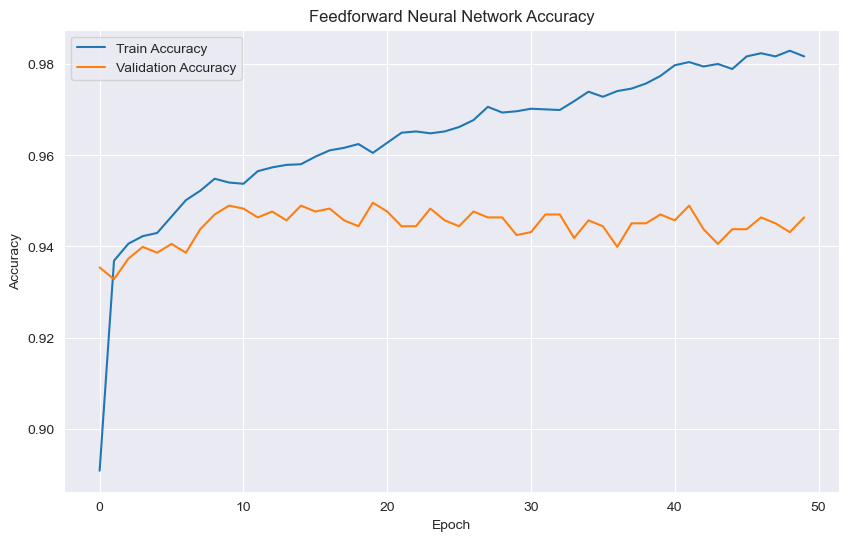

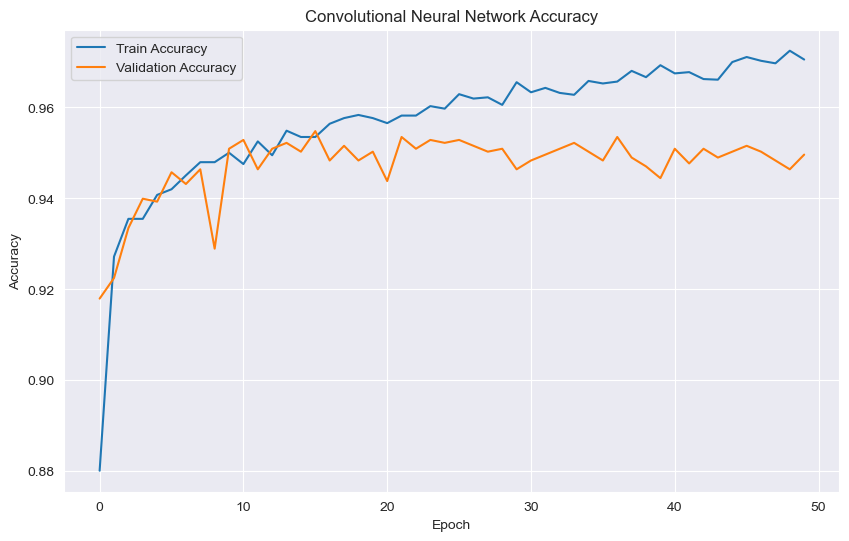

In [94]:
plot_accuracy(history_ffnn, 'Feedforward Neural Network Accuracy')
plot_accuracy(history_cnn, 'Convolutional Neural Network Accuracy')

In [95]:
print(f"Feedforward Neural Network Test Accuracy: {test_accuracy_ffnn}")
print(f"Convolutional Neural Network Test Accuracy: {test_accuracy_cnn}")

Feedforward Neural Network Test Accuracy: 0.9502905011177063
Convolutional Neural Network Test Accuracy: 0.9489993453025818


In [96]:
for i in range(len(data) - sequence_length):
    sequence = data.iloc[i:i+sequence_length]
    label = data.iloc[i+sequence_length]['Class']
    sequences.append(sequence.values)
    labels.append(label)

X = np.array(sequences)
y = np.array(labels)

In [97]:
# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [98]:
# Build an LSTM model
model = keras.Sequential([
    layers.LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True),
    layers.LSTM(64),
    layers.Dense(2, activation='softmax')  # Output layer (assuming 2 classes)
])

In [99]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [100]:
# Train the LSTM model
num_epochs = 50
batch_size = 32

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=num_epochs, batch_size=batch_size)

Epoch 1/50
223/226 [============================>.] - ETA: 0s - loss: 0.1371 - accuracy: 0.9605

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)

In [ ]:
# Generate accuracy charts
def plot_accuracy(history, title):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title(title)
    plt.legend()
    plt.show()

plot_accuracy(history, 'LSTM Model Accuracy')

print(f"LSTM Model Test Accuracy: {test_accuracy}")